In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
all_files = glob.glob("../data/raw/311/*.csv")

df_list = []
for file in sorted(all_files):
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

print(f"Loaded {len(df):,} records")
df.head()


Loaded 6,900,519 records


,unique_key,created_date,closed_date,agency,complaint_type,descriptor,status,borough,latitude,longitude
0,56416396,2023-01-01T00:00:00.000,2023-01-03T14:56:48.000,DOHMH,Food Poisoning,1 or 2,Closed,QUEENS,40.727630,-73.873614
1,56417527,2023-01-01T00:00:09.000,2023-01-01T00:36:06.000,NYPD,Illegal Fireworks,NaN,Closed,BROOKLYN,40.640915,-73.973642
2,56416252,2023-01-01T00:00:42.000,2023-01-01T17:34:15.000,NYPD,Noise - Residential,Loud Music/Party,Closed,BRONX,40.853848,-73.917709
3,56418795,2023-01-01T00:00:45.000,2023-01-01T01:24:10.000,NYPD,Illegal Parking,Posted Parking Sign Violation,Closed,MANHATTAN,40.754875,-74.000747
4,56418136,2023-01-01T00:00:46.000,2023-01-01T01:01:43.000,NYPD,Noise - Residential,Loud Music/Party,Closed,BROOKLYN,40.620665,-73.926040


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900519 entries, 0 to 6900518
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   unique_key      int64  
 1   created_date    object 
 2   closed_date     object 
 3   agency          object 
 4   complaint_type  object 
 5   descriptor      object 
 6   status          object 
 7   borough         object 
 8   latitude        float64
 9   longitude       float64
dtypes: float64(2), int64(1), object(7)
memory usage: 526.5+ MB


In [5]:
print(df.isnull().sum())
print(f"\nMissing %:")
print((df.isnull().sum() / len(df) * 100).round(2))


unique_key             0
created_date           0
closed_date       134465
agency                 0
complaint_type         0
descriptor        216657
status                 0
borough                0
latitude          104650
longitude         104650
dtype: int64

Missing %:
unique_key        0.00
created_date      0.00
closed_date       1.95
agency            0.00
complaint_type    0.00
descriptor        3.14
status            0.00
borough           0.00
latitude          1.52
longitude         1.52
dtype: float64


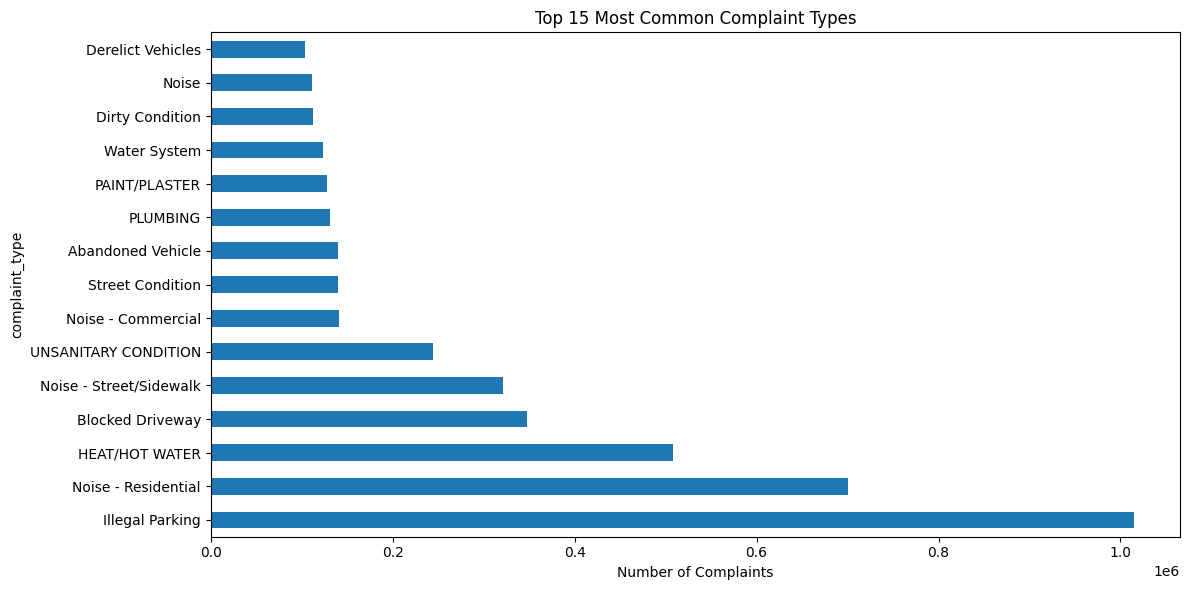

In [6]:
plt.figure(figsize=(12,6))
top_complaints = df["complaint_type"].value_counts().head(15)
top_complaints.plot(kind="barh")
plt.title("Top 15 Most Common Complaint Types")
plt.xlabel("Number of Complaints")
plt.tight_layout()
plt.show()

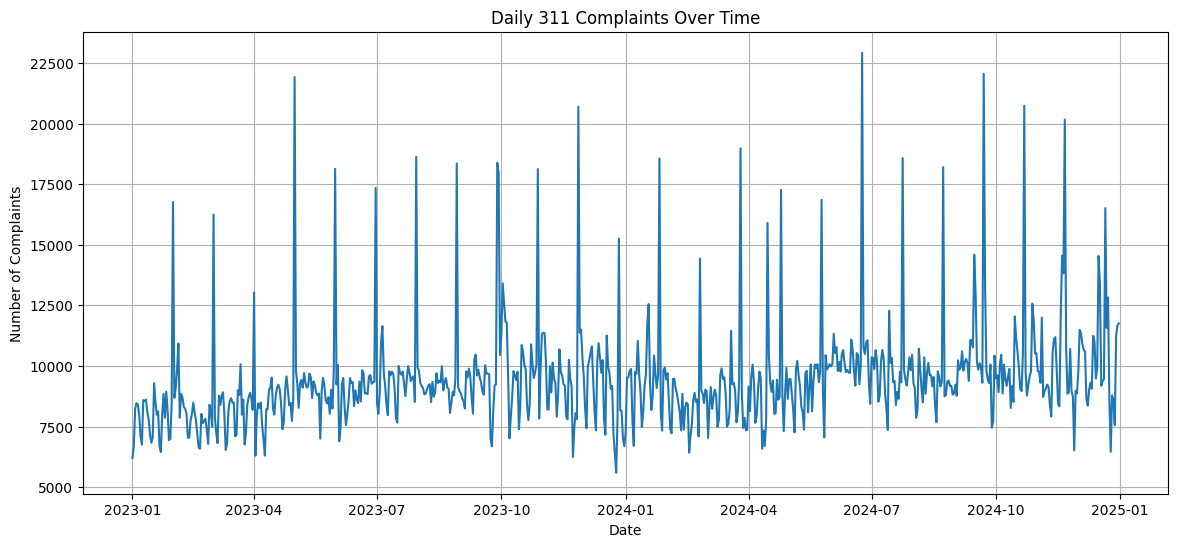

In [7]:
df['created_date'] = pd.to_datetime(df['created_date'])
daily_complaints = df.groupby(df['created_date'].dt.date).size()

plt.figure(figsize=(14, 6))
daily_complaints.plot()
plt.title('Daily 311 Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid()
plt.show()


borough
BROOKLYN         2112869
QUEENS           1656741
MANHATTAN        1453407
BRONX            1411165
STATEN ISLAND     257508
Unspecified         8829
Name: count, dtype: int64


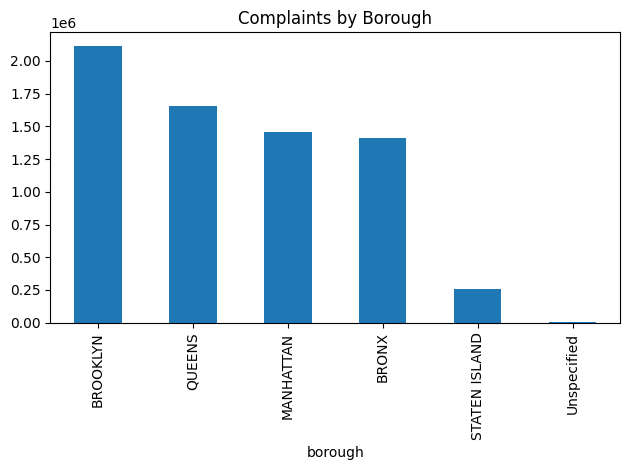

In [8]:
borough_counts = df['borough'].value_counts()
print(borough_counts)

borough_counts.plot(kind='bar')
plt.title('Complaints by Borough')
plt.tight_layout()
plt.show()


In [9]:
df['day_of_week'] = df['created_date'].dt.day_name()
day_counts = df['day_of_week'].value_counts()
print(day_counts)


day_of_week
Tuesday      1056494
Monday       1051809
Wednesday    1007367
Thursday      998864
Friday        989097
Sunday        911247
Saturday      885641
Name: count, dtype: int64


In [10]:
# Filter for weather-related complaints
weather_keywords = ['heat', 'water', 'street', 'sewer', 'snow', 'ice', 'leak']
weather_related = df[df['complaint_type'].str.lower().str.contains('|'.join(weather_keywords), na=False)]

print(f"Weather-related complaints: {len(weather_related):,} ({len(weather_related)/len(df)*100:.1f}%)")
print("\nTop weather-related types:")
print(weather_related['complaint_type'].value_counts().head(10))


Weather-related complaints: 1,450,102 (21.0%)

Top weather-related types:
complaint_type
HEAT/HOT WATER                   508530
Noise - Street/Sidewalk          321058
Street Condition                 139776
Water System                     123175
WATER LEAK                        91204
Street Light Condition            67445
Sewer                             58261
Non-Emergency Police Matter       48220
Root/Sewer/Sidewalk Condition     20394
Street Sweeping Complaint         17993
Name: count, dtype: int64
